## Introduction to Pandas

### Installing Pandas

For Python 2:
```
pip install django
pip install pandas
```

For Python 3:
```
pip3 install django
pip3 install pandas
```

### Intro to Pandas video

http://vimeo.com/59324550

### Pandas datatypes
Pandas has two datatypes (or data structures) that will be of greatest interest in this course, the series and the dataframe.  The series is an array that can contain multiple datatypes

### The series datatype

A pandas series can be thought of as a more flexible numpy array.  A single series can hold multiple datatypes

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Jupyter Notebook magic function. 
# Make plots show without having to call plt.show()
%matplotlib inline

### Create a series in Pandas

#### Create from a list

li = range(10)

# An index is automaticily created from the list index
mySeries = pd.Series(li)

print(mySeries)

# Pandas series are indexed in the same way that python lists are indexed.

print(mySeries[3])

animals = ['Bear', 'Moose', 'Mountain Goat']

animalsSeries = pd.Series(animals)

print(animalsSeries)

print(animalsSeries.loc('Bear'))
## Note the different datatypes of these series.

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64
3
0             Bear
1            Moose
2    Mountain Goat
dtype: object


In [3]:
animalsSeries[2]

'Mountain Goat'

We can also create data series from python dictionaries.  This will create an index that is the same as the dictionary index

In [4]:
# Create a dictionary of the state 
di = {"Montana": "Grizzly Bear", "Al": "Black Bear", "AK": "Moose", "AZ": "ring tailed cat", "Arkansas": "White Tail Deer", "CA": "Bear", "CO": "mountain goat", "FL": "panther"}

print(di)
print("==========")

stateAnimals = pd.Series(di)

# When the dictionary is converted to a Series by Pandas, the
# series is ordered by key value.  The python dictionary was not
# ordered by keys.
print(stateAnimals)
print("===========")

print(stateAnimals.loc["Montana"]) # Use loc to search by key value
print("=========")
stateAnimals.iloc[1] # Use iloc to search by key index

{'Montana': 'Grizzly Bear', 'Al': 'Black Bear', 'AK': 'Moose', 'AZ': 'ring tailed cat', 'Arkansas': 'White Tail Deer', 'CA': 'Bear', 'CO': 'mountain goat', 'FL': 'panther'}
AK                    Moose
AZ          ring tailed cat
Al               Black Bear
Arkansas    White Tail Deer
CA                     Bear
CO            mountain goat
FL                  panther
Montana        Grizzly Bear
dtype: object
Grizzly Bear


'ring tailed cat'

When indexing without loc or iloc, Pandas will try to infer which is best

In [5]:
stateAnimals[4]

'Bear'

In [6]:
stateAnimals['FL']

'panther'

Doing this can lead to cases where Pandas is unable to correctly infer loc vs iloc.  Therefore it is best to explicity use the appropriate indexing method. 

You can print out the indicies of the series with the .index property

In [7]:
stateAnimals.index

Index(['AK', 'AZ', 'Al', 'Arkansas', 'CA', 'CO', 'FL', 'Montana'], dtype='object')

#### Numpy methods

Numpy methods work on Pandas series.  Serveral stat metheds are also implimented as method functions of the Pandas series object itself.

`%%timeit` is a special function of the Jupyter notebooks that allows performance comparisions between different methods.

In [8]:
%%timeit -n 100
mySeries.sum()

The slowest run took 5.34 times longer than the fastest. This could mean that an intermediate result is being cached.
321 µs ± 274 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
%%timeit -n 100
np.sum(mySeries)

264 µs ± 64.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Broadcasting

In [37]:
print(mySeries)

mySeries += 10 # This adds 10 to every member of the series.

print(mySeries) # The original series is modified.

# If we want to preserve original data, make a copy of the series.

newSeries = mySeries.copy()

print(newSeries)

# Use the .head() method to get a view of only the first 5 
# elements
print(newSeries.head())
print(newSeries.head(2)) # 5 is the default, but you can specifiy the number of data points to show.

print(newSeries.tail(3)) # the tail method does the same for the last data points of a Series.

0    50
1    51
2    52
3    53
4    54
5    55
6    56
7    57
8    58
9    59
dtype: int64
0    60
1    61
2    62
3    63
4    64
5    65
6    66
7    67
8    68
9    69
dtype: int64
0    60
1    61
2    62
3    63
4    64
5    65
6    66
7    67
8    68
9    69
dtype: int64
0    60
1    61
2    62
3    63
4    64
dtype: int64
0    60
1    61
dtype: int64
7    67
8    68
9    69
dtype: int64


#### Changing values without broadcasting

In [38]:
for label, value in newSeries.iteritems():
    print(label, item)
    # Update the 
    if(value % 2 != 0):
        newSeries.set_value(label, value+)

0 60
1 61
2 62
3 63
4 64
5 65
6 66
7 67
8 68
9 69


In [43]:
newSeries.loc[newSeries % 2 == 0] # This is an example of boolean masking.

0    60
2    62
4    64
6    66
8    68
dtype: int64

In [45]:
# This can be used to change only some vaules
newSeries.loc[newSeries % 2 == 0] += 3

newSeries

0    63
1    61
2    65
3    63
4    67
5    65
6    69
7    67
8    71
9    69
dtype: int64

A series can have mixed types in the index and values.

Data types will be cast to the most general type.

In [50]:
# Mixed type data series.
newSeries["Animal"] = 'Bear'
print(newSeries)

0           63
1           61
2           65
3           63
4           67
5           65
6           69
7           67
8           71
9           69
Animal    Bear
dtype: object


In [23]:
numpyArray = np.arange(5)
arraySeries = pd.Series(numpyArray)

#numpyArray[5] = 'Bear' # Can't add to a numpy array like this
arraySeries[5] = 'Bear' # But you can do this with pandas series
# You can append to numpy array with the append method.
numpyArray = np.append(numpyArray, ['Bear']) # If you do this all elements are cast to strings

#numpyArray
print(type(arraySeries.iloc[1])) # This is an int type
print(type(arraySeries.iloc[5])) # This is a string type

#dir(numpyArray)

#numpyArray.append('Bear')

<class 'int'>
<class 'str'>


In [74]:
newSeries.index.name = "Named Index"
print(newSeries)

Named Index
0           63
1           61
2           65
3           63
4           67
5           65
6           69
7           67
8           71
9           69
Animal    Bear
dtype: object


#### Comparision Operations

#### Series string methods

In [ ]:
### upper, lower, len, strip, split

#### Plotting a Series

Pandas provides a simple wrapper function to matplotlib.pyplot.plot()

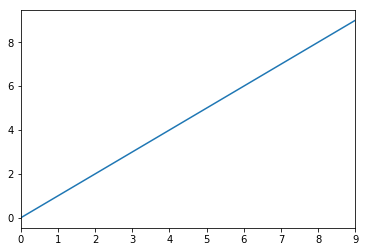

In [81]:
mySeries.plot()

### The Dataframe data type

A Dataframe can be created from a group of Series where each series is represented as a row of the dataframe.

In [11]:
import pandas as pd
import numpy as np

purchase_1 = pd.Series({'Name': 'Chris',
                        'Item Purchased': 'Dog Food',
                        'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Kevyn',
                        'Item Purchased': 'Kitty Litter',
                        'Cost': 2.50})
purchase_3 = pd.Series({'Name': 'Vinod',
                        'Item Purchased': 'Bird Seed',
                        'Cost': 5.00})
purchase_4 = pd.Series({'Name': 'Bob',
                        'Item Purchased': 'Fish Food',
                        'Cost': 3.50})
df = pd.DataFrame([purchase_1, purchase_2, purchase_3, purchase_4], index=['Store 1', 'Store 1', 'Store 2', 'Store 3'])
df.head()

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Bird Seed,Vinod
Store 3,3.5,Fish Food,Bob


#### Dataframe Indexing

Pandas Dataframes can be indexed by row or column.  

In [12]:
# We can use the loc and iloc methods to select rows of the Dataframe

df.iloc[2] # Select the 3rd index

Cost                      5
Item Purchased    Bird Seed
Name                  Vinod
Name: Store 2, dtype: object

In [13]:
df.loc['Store 1'] # Select rows with the index 'Store 1'

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn


In [14]:
df.loc['Cost'] # We cannot use loc on a column heading.  This gives and error

KeyError: 'the label [Cost] is not in the [index]'

The following two calls give the same result (select a column from the dataframe.)

In [15]:
%%timeit -n 100
df.loc[:,'Cost']

138 µs ± 22.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
%%timeit -n 100
df['Cost']

8.59 µs ± 2.97 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


If multiple columns are to be selected a list of columns is passed to the indexing operator.

In [17]:
df[['Name', 'Cost']]

,Name,Cost
Store 1,Chris,22.5
Store 1,Kevyn,2.5
Store 2,Vinod,5.0
Store 3,Bob,3.5


In [18]:
df.loc[:, ['Name', 'Cost']] # the loc operator can also be used with a list of columns.

,Name,Cost
Store 1,Chris,22.5
Store 1,Kevyn,2.5
Store 2,Vinod,5.0
Store 3,Bob,3.5


In [20]:
df['Cost']

Store 1    22.5
Store 1     2.5
Store 2     5.0
Store 3     3.5
Name: Cost, dtype: float64

In [19]:
# Indexing by dot notation is also available

df.Cost

Store 1    22.5
Store 1     2.5
Store 2     5.0
Store 3     3.5
Name: Cost, dtype: float64

#### Deleting rows or columns

Use the .drop method to Delete columns or rows from a dataframe.

In [21]:
df

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Bird Seed,Vinod
Store 3,3.5,Fish Food,Bob


In [24]:
# Drop row for 'Store 2'
df.drop('Store 2')

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 3,3.5,Fish Food,Bob


In [25]:
# drop returns a new dataframe, original data is retained unless you reassign
#
# You can set inplace=True to override.
df

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Bird Seed,Vinod
Store 3,3.5,Fish Food,Bob


In [27]:
# Now the original data is affected.
df.drop('Store 2', inplace=True)

In [28]:
df

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 3,3.5,Fish Food,Bob


In [29]:
# If more then one column has the same index value, drop will delete all.
df.drop('Store 1')

,Cost,Item Purchased,Name
Store 3,3.5,Fish Food,Bob


In [30]:
# Use the axis parameter to select columns
df.drop('Cost', 1)

,Item Purchased,Name
Store 1,Dog Food,Chris
Store 1,Kitty Litter,Kevyn
Store 3,Fish Food,Bob


#### Adding columns to a dataframe

In [34]:
# Adding a column with a default value for all rows.
df['Billing'] = np.nan
print(df)

         Cost Item Purchased   Name  Billing
Store 1  22.5       Dog Food  Chris      NaN
Store 1   2.5   Kitty Litter  Kevyn      NaN
Store 3   3.5      Fish Food    Bob      NaN


In [36]:
# Adding specific values with a list
df['Billing'] = ['Cash', 'Credit', 'Other']
df

,Cost,Item Purchased,Name,Billing
Store 1,22.5,Dog Food,Chris,Cash
Store 1,2.5,Kitty Litter,Kevyn,Credit
Store 3,3.5,Fish Food,Bob,Other


In [45]:
# Adding by a Series (best method)
df = df.reset_index() # This changes to a unique index
df['Address'] = pd.Series({0: '111 1st St', 2: '33 4th Ave'}) # Add the values

ValueError: cannot insert level_0, already exists

In [51]:
print(df)
df.set_index('index') # This sets the index back to Store number

   level_0    index  Cost Item Purchased   Name Billing     Address
0        0  Store 1  22.5       Dog Food  Chris    Cash  111 1st St
1        1  Store 1   2.5   Kitty Litter  Kevyn  Credit         NaN
2        2  Store 3   3.5      Fish Food    Bob   Other  33 4th Ave


,level_0,Cost,Item Purchased,Name,Billing,Address
index,,,,,,
Store 1,0,22.5,Dog Food,Chris,Cash,111 1st St
Store 1,1,2.5,Kitty Litter,Kevyn,Credit,NaN
Store 3,2,3.5,Fish Food,Bob,Other,33 4th Ave


#### Create a dataframe with more than one index

You can add a additional index to a dataframe.

In [56]:
print(df)
# Set a multilevel index
df.set_index(['index', 'Cost'])

   level_0    index  Cost Item Purchased   Name Billing     Address
0        0  Store 1  22.5       Dog Food  Chris    Cash  111 1st St
1        1  Store 1   2.5   Kitty Litter  Kevyn  Credit         NaN
2        2  Store 3   3.5      Fish Food    Bob   Other  33 4th Ave


level_0 Item Purchased   Name Billing     Address
index   Cost                                                   
Store 1 22.5        0       Dog Food  Chris    Cash  111 1st St
        2.5         1   Kitty Litter  Kevyn  Credit         NaN
Store 3 3.5         2      Fish Food    Bob   Other  33 4th Ave

Dataframes and Series can be created with a multi-level index

In [ ]:
## Create a index with the MultiIndex command.

#### Concat

In [91]:
df1 = pd.DataFrame(np.random.randn(20,4))
df2 = pd.DataFrame(np.random.randn(20,4))

# By default concat will append as new rows.  Index values are repeated if 
# the same index is in both of the original dataframes.
df3 = pd.concat([df1, df2])
df3

,0,1,2,3
0,-1.168765,0.371645,1.565012,-0.845011
1,0.517102,0.392093,1.800495,-0.300281
2,0.173541,1.028144,0.578693,-1.537975
3,-0.272503,0.098702,0.487645,-1.299863
4,0.991742,-0.460063,0.644994,-0.842089
5,-0.650223,0.712008,1.931752,-0.065586
6,-0.217478,0.190247,-1.591772,1.685256
7,0.670938,-0.298040,0.435240,1.335129
8,0.050563,0.450967,-0.316447,-0.829448
9,-1.180647,2.225251,1.646626,-1.463991


In [93]:
# Specify axis=1 to append the series together as new columns.

df4 = pd.concat([df1, df2], axis=1)
df4

,0,1,2,3,0,1,2,3
0,-1.168765,0.371645,1.565012,-0.845011,1.825941,-0.855205,0.425971,0.830299
1,0.517102,0.392093,1.800495,-0.300281,0.931016,0.757887,-0.804738,1.692968
2,0.173541,1.028144,0.578693,-1.537975,0.225035,-0.273615,-0.013248,-1.132959
3,-0.272503,0.098702,0.487645,-1.299863,-0.344141,0.085986,0.529326,-0.282040
4,0.991742,-0.460063,0.644994,-0.842089,-2.076010,-0.148801,-0.006694,-1.203345
5,-0.650223,0.712008,1.931752,-0.065586,-0.259425,-0.298473,0.310002,0.591969
6,-0.217478,0.190247,-1.591772,1.685256,-0.773571,-0.910278,-0.420218,-0.398250
7,0.670938,-0.298040,0.435240,1.335129,-0.569270,0.018300,-0.015293,-0.997104
8,0.050563,0.450967,-0.316447,-0.829448,-0.490252,-0.304810,-0.247996,0.379588
9,-1.180647,2.225251,1.646626,-1.463991,-0.179332,1.094338,-0.012596,0.355365


#### Dataframe Queries



#### Plotting a dataframe

In [84]:
# Dataframes can be produced directly from numpy
# 2-D arrays.

df = pd.DataFrame(np.random.randn(1000, 4))
df

,0,1,2,3
0,-1.038526,-0.084759,0.050075,0.015006
1,0.145861,0.995847,0.714745,-0.162379
2,1.182988,-0.183175,-1.167302,-0.523386
3,0.344461,2.460609,0.020494,1.357933
4,-0.300881,1.668455,0.489863,0.849273
5,-0.787487,-0.887616,-0.044906,-2.361368
6,0.689660,0.207169,0.330773,-1.350909
7,0.508577,0.749349,1.980057,-0.551125
8,-1.309848,-0.058530,-0.076386,-0.687721
9,-1.397511,1.038429,1.044666,-0.145340


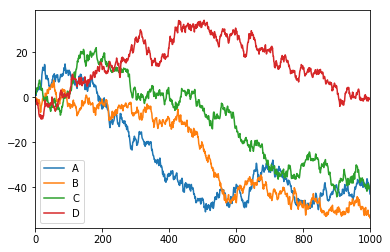

In [85]:
# column labels can be provided by the columns attribute.

df = pd.DataFrame(np.random.randn(1000, 4), columns=list('ABCD'))

df = df.cumsum()

df.plot()

#### Panel Datatype

The panel datatype is a collection of dataframes in a 3-D array like data structure.  The panel datatype is depreceated in the latest versions of Pandas in favor of multi-indexed dataframes.